In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
data = pd.read_csv('titanic.csv')

In [3]:
# Vista inicial de los datos
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


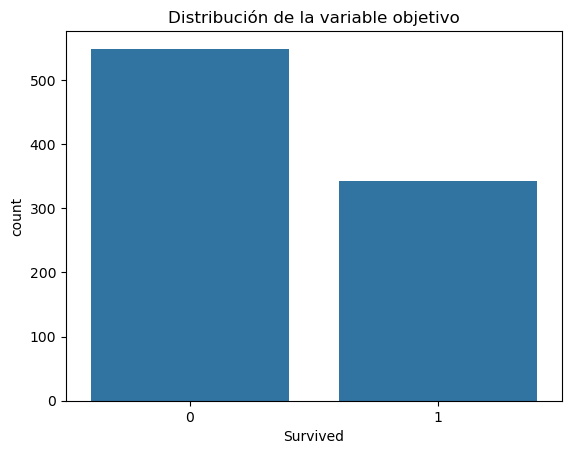

In [6]:
# Distribución de las variables categóricas y numéricas
sns.countplot(data=data, x='Survived')
plt.title('Distribución de la variable objetivo')
plt.show()

In [8]:
# Identificar valores faltantes
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


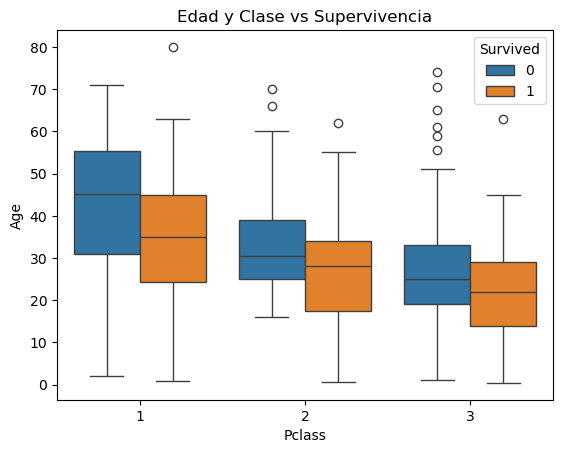

In [9]:
# Visualizar relaciones entre variables
sns.boxplot(data=data, x='Pclass', y='Age', hue='Survived')
plt.title('Edad y Clase vs Supervivencia')
plt.show()

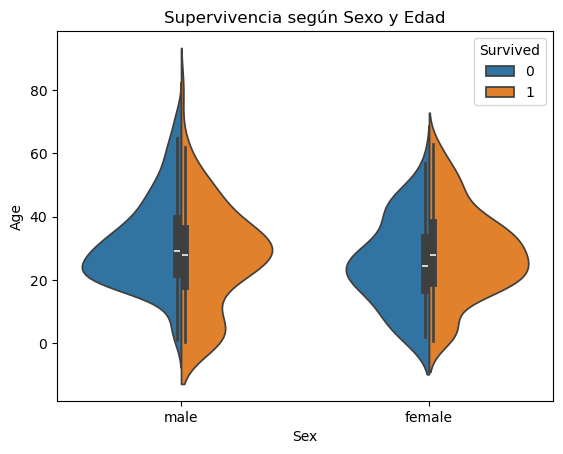

In [10]:
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True)
plt.title('Supervivencia según Sexo y Edad')
plt.show()

In [23]:
# Verificar limpieza
print(data.isnull().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [24]:
# Separar características y objetivo
X = data.drop('Survived', axis=1)
y = data['Survived']

In [25]:
# Selección de características con correlación
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas:", selected_features)
X = X[selected_features]

Características seleccionadas: Index(['Pclass', 'Age', 'Parch', 'Fare', 'Sex_male'], dtype='object')


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}')

Tamaño de entrenamiento: (712, 5), Tamaño de prueba: (179, 5)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo
logreg = LogisticRegression()

# Grid Search para optimización de hiperparámetros
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
best_model = grid.best_estimator_

Mejores parámetros: {'C': 1, 'solver': 'liblinear'}


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones
y_pred = best_model.predict(X_test)

In [30]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7932960893854749
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



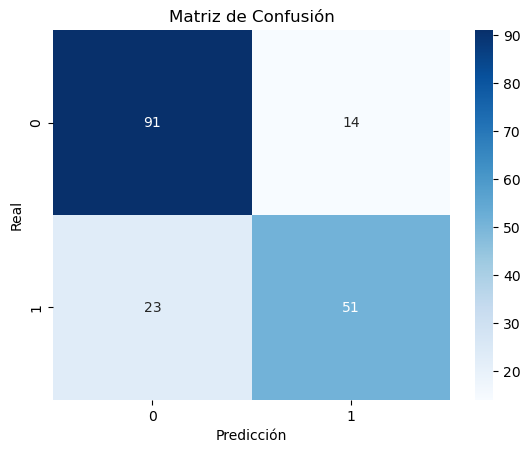

In [31]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

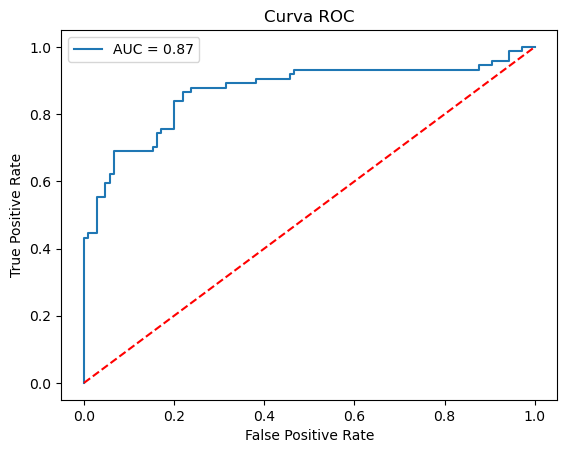

In [32]:
# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()